# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [ ]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('/BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


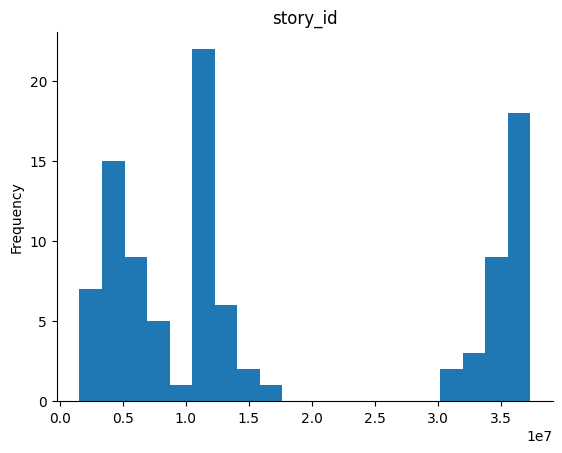

In [ ]:
# @title story_id

from matplotlib import pyplot as plt
df['story_id'].plot(kind='hist', bins=20, title='story_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [ ]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [ ]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

H0 (answer in words):
Low levels of masculinity in male characters do not affect fanfiction success when controlling for publication year and lexical richness.

In [ ]:
#H0 (answer in words):
'''low levels of masculinity in male characters do not affect fanfiction success when controlling for publication year and lexical richness.'''

'low levels of masculinity in male characters do not affect fanfiction success when controlling for publication year and lexical richness.'

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


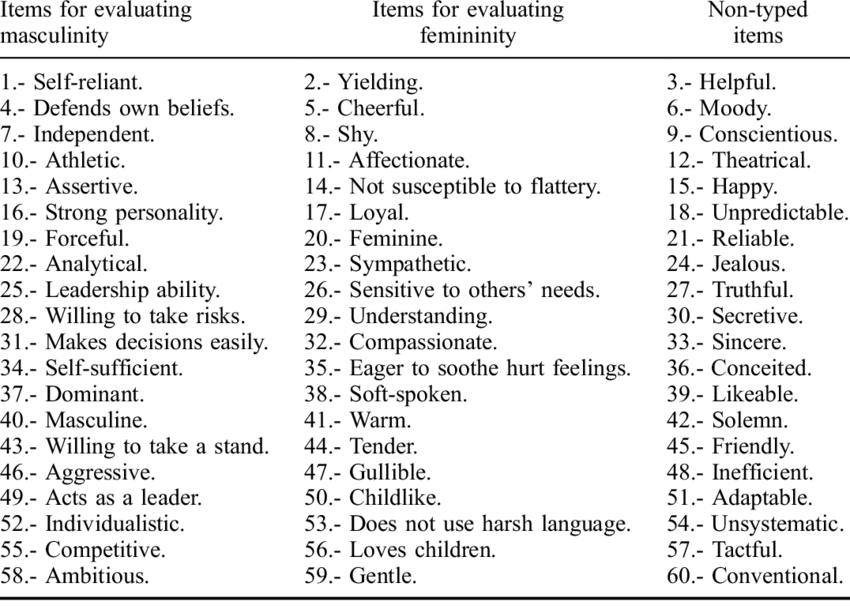

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [ ]:
#import google drive, to connect the colab to the drive to read and save contents in the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# specify a place in my Google Drive where I'd like to save the output of this notebook
colab_directory_path = '/content/gdrive/MyDrive/riveter-test'

In [ ]:
#go inside the folder
%cd /content/gdrive/MyDrive/riveter-test

/content/gdrive/MyDrive/riveter-test


In [ ]:
#download the Riveter code and data from its Github repository
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [ ]:
#check that the download was successful by printing the contents of my Google Drive folder.
%ls

barplot.pride_and_prejudice.least_power.pdf  heatmap.pride_and_prejudice.misslucas.pdf
barplot.pride_and_prejudice.most_power.pdf   heatmap.pride_and_prejudice.mrdarcy.pdf
barplot.prideandprejudice.pronouns.pdf       heatmap.pride_and_prejudice.sirwilliam.pdf
heatmap.pride_and_prejudice.elizabeth.pdf    heatmap.prideandprejudice.thirdplural.pdf
heatmap.prideandprejudice.feminine.pdf       riveter-nlp/
heatmap.pride_and_prejudice.lizzy.pdf        riveter.pride_and_prejudice.pkl
heatmap.prideandprejudice.masculine.pdf


In [ ]:
# move inside the Riveter folder,  to import the functions we want to use
%cd /content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter

/content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter


In [ ]:
#install some spaCy models and Python packages to support Riveter
!pip install -U spacy-experimental

In [ ]:
# downlaod ~500Mb of data
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 1.3 MB/s eta 0:00:00


In [ ]:
#download spacy
!python -m spacy download en_core_web_sm

2024-03-15 23:09:59.855881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 23:09:59.855960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 23:09:59.859081: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 23:10:01.704127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#install seaborn
!pip install seaborn

Now we have prepared all the dependencies needed.

In [ ]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [ ]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [ ]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
scores_dict= {}
riveter = Riveter()
riveter.load_sap_lexicon('power')


Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [ ]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments,
             text_ids,
             num_bootstraps=20,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals(frequency_threshold=1)
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:35<51:58, 35.04s/it]

2024-03-15 23:14:32 Complete!
Story ID: 4706144, Masculine Power Score: 0.0860754892123079



 33%|███▎      | 1/3 [00:13<00:26, 13.42s/it]

**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [ ]:
# Q2 (code)
df.head()

In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [ ]:
!pip install lexicalrichness

In [ ]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.078076,0.428571
1,4752980,2015,1164,79.0,0.0,Worry\n\nYou stumbled through the apartment do...,0.289621,0.400665
2,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.648889,0.428986
3,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.139857,0.412295
4,5282729,2015,1173,17.0,0.0,"Unspoken Words\n\nYou come back into the flat,...",0.214248,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'story_id'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'comments'}>,
        <Axes: title={'center': 'masculine_power_score'}>],
       [<Axes: title={'center': 'lexical_richness'}>, <Axes: >, <Axes: >]],
      dtype=object)

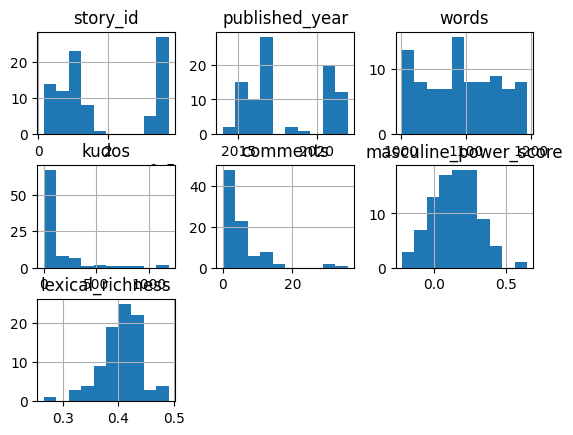

In [ ]:
# Q3a (code): Check data distribution
df.hist()


In [ ]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,133.888889,5.000000,0.143451,0.405027
std,1.307922e+07,2.612177,55.327048,229.121598,6.709041,0.161057,0.037109
min,1.572659e+06,2014.000000,1002.000000,0.000000,0.000000,-0.226886,0.264443
25%,7.448760e+06,2016.000000,1042.250000,19.250000,0.000000,0.029244,0.384458
50%,1.224167e+07,2017.000000,1095.000000,53.000000,3.000000,0.141375,0.410169
75%,3.517148e+07,2021.000000,1141.750000,121.000000,6.750000,0.247129,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.648889,0.491349


In [ ]:
# Q3c (code): Check for any missing values
df.isnull().sum()

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64

In [ ]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df.fillna(0, inplace=True)
df.isnull().sum()


story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

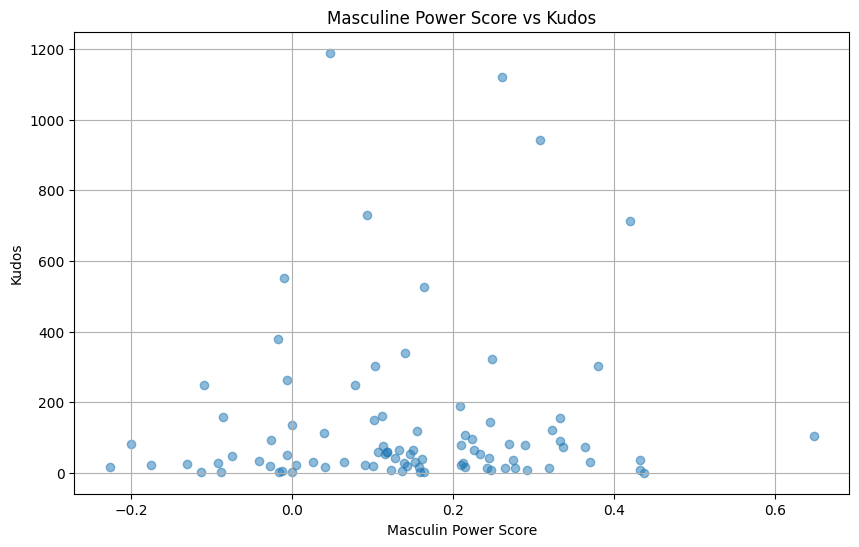

In [ ]:
# Q4 (code): import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['masculine_power_score'], df['kudos'], alpha=0.5)
plt.title('Masculine Power Score vs Kudos')
plt.xlabel('Masculin Power Score')
plt.ylabel('Kudos')
plt.grid(True)
plt.show()

**Q5. Multiple Regression and Analysis**

In [ ]:
from statistics import LinearRegression
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
#y = Kudos, X = masculine_power_score ，published_year，lexical_richness
# Correct import for LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

y = df['kudos']
X = df[['masculine_power_score','published_year','lexical_richness']]

#fitting the multiple linear regression model
model = LinearRegression()
model.fit(X,y)

#For statsmodels, adding a constant to include an intercept in the model
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.548
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00158
Time:                        23:13:04   Log-Likelihood:                -608.32
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.986e+

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared
'''R-squared: 16.2% of the variation in "kudos" can be explained by the model's predictors (masculine power score, published year, and lexical richness). The majority of "kudos" are unexplained by these specific predictors. There may be other factorsinfluencing "kudos". Adj. R-squared is to balance the impact of increasing the number of independent variables on the loss of degrees of freedom.After adjusting for the number of predictors, only 13.3% of the variation in "kudos" is explained by the model. The observation points do not fit the model well.
THerefore,further tests need to be conducted.'''

'R-squared: 16.2% of the variation in "kudos" can be explained by the model\'s predictors (masculine power score, published year, and lexical richness). The majority of "kudos" are unexplained by these specific predictors. There may be other factorsinfluencing "kudos". Adj. R-squared is to balance the impact of increasing the number of independent variables on the loss of degrees of freedom.After adjusting for the number of predictors, only 13.3% of the variation in "kudos" is explained by the model. The observation points do not fit the model well.\nTHerefore,further tests need to be conducted.'

In [ ]:
# Q6b (words): Interpret F-test result

'''The F-statistic is 5.48, suggesting that the explained variance is approximately 5.548 times greater than the unexplained variance due to the model.The overall linear relationship of the equation is significant,which does not necessarily mean that the impact of each explanatory variable on the dependent variable is significant. Further significance tests need to be conductedon each explanatory variable.'''

'The F-statistic is 5.48, suggesting that the explained variance is approximately 5.548 times greater than the unexplained variance due to the model.The overall linear relationship of the equation is significant,which does not necessarily mean that the impact of each explanatory variable on the dependent variable is significant. Further significance tests need to be conductedon each explanatory variable.'

In [ ]:
# Q6c (words): Interpret coefficients and t-test result
'''const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.The coefficient for masculine power score is approximately 55.08 and the coefficient for lexical richness is approximately 387.51, both suggesting that an increase in them is associated with an increase in "kudos.". Masculine Power Score and Lexical Richness both have high p-values (0.697 and 0.528, respectively), suggesting that we cannot reject the null hypothesis for these predictors. Therefore, within this model, they do not have a statistically significant impact on "kudos." Published Year, on the other hand, has a very low p-value, indicating that its effect on "kudos" is statistically significant.This is suggesting that the time of publication has a significant and negative impact on the reception of "kudos."'''

'const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.The coefficient for masculine power score is approximately 55.08 and the coefficient for lexical richness is approximately 387.51, both suggesting that an increase in them is associated with an increase in "kudos.". Masculine Power Score and Lexical Richness both have high p-values (0.697 and 0.528, respectively), suggesting that we cannot reject the null hypothesis for these predictors. Therefore, within this model, they do not have a statistically significant impact on "kudos." Published Year, on the other hand, has a very low p-value, indicating that its effect on "kudos" is statistically significant.This is suggesting that the time of publication has a significant and negative impact on the reception of "kudos."'

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [ ]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from scipy import stats


# Placeholder for residuals after model fitting
predictor = X
response = y
linreg = LinearRegression()
regression_model = linreg.fit(predictor, response)
predictions = regression_model.predict(predictor)

# Calculating residuals
residuals = response - predictions
# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk Test:', shapiro_test)


Shapiro-Wilk Test: ShapiroResult(statistic=0.6869091987609863, pvalue=1.4770627212654097e-12)


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:
''' 0.687 suggests that the residuals are not closely following a normal distribution.A p-value below 0.05 indicates strong evidence against the null hypothesis, and suggests that the data do not follow a normal distribution.The Shapiro-Wilk test results suggest that the model's residuals do not follow a normal distribution, indicating potential issues with the model assumptions or data that warrant further investigation.'''

" 0.687 suggests that the residuals are not closely following a normal distribution.A p-value below 0.05 indicates strong evidence against the null hypothesis, and suggests that the data do not follow a normal distribution.The Shapiro-Wilk test results suggest that the model's residuals do not follow a normal distribution, indicating potential issues with the model assumptions or data that warrant further investigation."

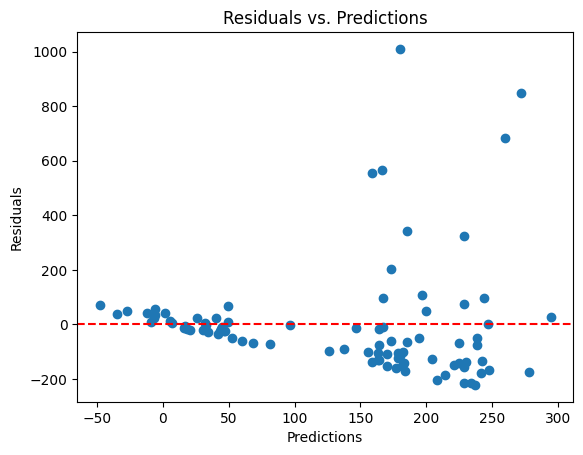

In [ ]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions )

plt.scatter(predictions, residuals)
plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:
'''Outliers:There are a few points far from the y=0 line, which might indicate outliers in your data that could be affecting your model's performance.'''

"Outliers:There are a few points far from the y=0 line, which might indicate outliers in your data that could be affecting your model's performance."

**Q8: Multicollinearity**

In [ ]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Checking VIF (Variance Inflation Factor) for multicollinearity

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0  masculine_power_score    1.810457
1         published_year  121.596901
2       lexical_richness  122.153896


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:
'''masculine_power_score (VIF = 1.810457): This VIF value suggests low multicollinearity.This suggests that "masculine_power_score" is relatively independent of other predictors in the model, meaning its contribution to the regression model can be clearly interpreted without significant interference from correlations with other variables.

published_year (VIF = 121.596901),lexical_richness (VIF = 122.153896): Both of these variables have VIF values far exceeding the common thresholds, indicating a strong presence of multicollinearity. Such high VIF values suggest that these variables are highly correlated with one or more other independent variables in the model. This high level of multicollinearity suggests these variables share a significant amount of information with one or more variables in the model, which may make it difficult to isolate their individual effects on the dependent variable'''

'masculine_power_score (VIF = 1.810457): This VIF value suggests low multicollinearity.This suggests that "masculine_power_score" is relatively independent of other predictors in the model, meaning its contribution to the regression model can be clearly interpreted without significant interference from correlations with other variables.\n\npublished_year (VIF = 121.596901),lexical_richness (VIF = 122.153896): Both of these variables have VIF values far exceeding the common thresholds, indicating a strong presence of multicollinearity. Such high VIF values suggest that these variables are highly correlated with one or more other independent variables in the model. This high level of multicollinearity suggests these variables share a significant amount of information with one or more variables in the model, which may make it difficult to isolate their individual effects on the dependent variable'

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
''' This study employs a quantitative approach using distant reading to analyze the factors influencing the success of fanfiction novels. However, the extent to which the Masculine Power Score can represent Masculine Power within the novels is a topic worth exploring. Is the mere extraction of pronouns an oversimplification of the research findings?
Incorporating close reading to supplement the context that was overlooked during data processing would serve as a valuable addition to the findings of this research.'''


' This study employs a quantitative approach using distant reading to analyze the factors influencing the success of fanfiction novels. However, the extent to which the Masculine Power Score can represent Masculine Power within the novels is a topic worth exploring. Is the mere extraction of pronouns an oversimplification of the research findings?\nIncorporating close reading to supplement the context that was overlooked during data processing would serve as a valuable addition to the findings of this research.'

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.